In [1]:
import re
import pandas as pd


In [2]:
f=open('WhatsApp Chat with 21BCS_IOT_609_B.txt','r',encoding='utf-8')

In [3]:
data=f.read()

In [4]:
print(type(data))

<class 'str'>


In [5]:
pattern = '\d{1,2}/\d{1,2}/\d{2}, \d{1,2}:\d{2}\s?(?:AM|PM)'

In [6]:
messages = re.split(pattern, data)[1:]
messages

[' - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 ' - ~\u202fYash created group "609 B"\n',
 ' - ~\u202fYash added you\n',
 ' - ~\u202fYash added +91 70719 28230\n',
 ' - +91 70795 22590: Wo section wali list hai kisi pe to send karna please\n',
 ' - +91 83038 16984: <Media omitted>\n',
 ' - +91 92559 37959: https://docs.google.com/forms/d/e/1FAIpQLSe7fyL4S7DjbmGyW50ayENpnmvOzxy93GKmgE78enRoJWmllA/viewform?usp=sf_link\n',
 ' - +91 92559 37959: Dear all students kindly fill this form asap\n',
 ' - ~\u202fYash added +91 82697 48141\n',
 ' - ~\u202fYash added +91 90062 57777\n',
 ' - ~\u202fYash added +91 93699 37367\n',
 ' - ~\u202fNamrata changed the group name from "609 B" to "21BCS_IOT_609_B"\n',
 ' - ~\u202fYash added +91 92566 44220\n',
 ' - +91 92559 37959: Reminder kindly fill it asap\n',
 ' - +91 92559 37959: https://docs.google.com/forms/d/e/1FAIpQLSe7fyL4S7DjbmGyW50ayENpnmvOzxy93

In [7]:
dates=re.findall(pattern,data)
dates

['7/27/23, 12:37\u202fPM',
 '7/27/23, 12:37\u202fPM',
 '7/27/23, 12:37\u202fPM',
 '7/27/23, 12:37\u202fPM',
 '7/27/23, 12:38\u202fPM',
 '7/27/23, 12:39\u202fPM',
 '7/27/23, 12:41\u202fPM',
 '7/27/23, 12:42\u202fPM',
 '7/27/23, 12:45\u202fPM',
 '7/27/23, 12:51\u202fPM',
 '7/27/23, 12:54\u202fPM',
 '7/27/23, 1:07\u202fPM',
 '7/27/23, 1:25\u202fPM',
 '7/28/23, 11:56\u202fAM',
 '7/28/23, 1:38\u202fPM',
 '7/28/23, 8:10\u202fPM',
 '7/28/23, 9:12\u202fPM',
 '7/29/23, 9:31\u202fAM',
 '7/29/23, 9:32\u202fAM',
 '7/29/23, 10:59\u202fAM',
 '7/29/23, 11:24\u202fAM',
 '7/29/23, 11:25\u202fAM',
 '7/29/23, 11:49\u202fAM',
 '7/29/23, 11:49\u202fAM',
 '7/29/23, 12:16\u202fPM',
 '7/29/23, 4:26\u202fPM',
 '7/29/23, 11:45\u202fPM',
 '7/30/23, 8:54\u202fAM',
 '7/31/23, 11:14\u202fAM',
 '7/31/23, 3:04\u202fPM',
 '7/31/23, 3:06\u202fPM',
 '7/31/23, 3:06\u202fPM',
 '7/31/23, 3:06\u202fPM',
 '7/31/23, 3:07\u202fPM',
 '7/31/23, 3:08\u202fPM',
 '7/31/23, 3:18\u202fPM',
 '7/31/23, 3:18\u202fPM',
 '7/31/23, 3:19\u2

In [8]:
import pandas as pd

# Assuming 'messages' and 'dates' are your lists of messages and dates
df = pd.DataFrame({'user_message': messages, 'message_date': dates})

# Convert message_date type to datetime with 12-hour format and handle errors by coercing to NaT
df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %I:%M\u202f%p')


# Rename the 'message_date' column to 'date'
df.rename(columns={'message_date': 'date'}, inplace=True)

# Display the first few rows of the DataFrame
df.head(10)


,user_message,date
0,- Messages and calls are end-to-end encrypted...,2023-07-27 12:37:00
1,"- ~ Yash created group ""609 B""\n",2023-07-27 12:37:00
2,- ~ Yash added you\n,2023-07-27 12:37:00
3,- ~ Yash added +91 70719 28230\n,2023-07-27 12:37:00
4,- +91 70795 22590: Wo section wali list hai k...,2023-07-27 12:38:00
5,- +91 83038 16984: <Media omitted>\n,2023-07-27 12:39:00
6,- +91 92559 37959: https://docs.google.com/fo...,2023-07-27 12:41:00
7,- +91 92559 37959: Dear all students kindly f...,2023-07-27 12:42:00
8,- ~ Yash added +91 82697 48141\n,2023-07-27 12:45:00
9,- ~ Yash added +91 90062 57777\n,2023-07-27 12:51:00


In [9]:
df.shape

(1248, 2)

In [10]:
# Assuming you have already created the DataFrame 'df'
#Sepparate the user and messages
users = []
messages = []

for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if len(entry) > 1:  # Check if there is at least one element in entry
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

# Create new columns directly without assuming the existence of 'user_message'
df['user'] = users
df['message'] = messages

# Drop the original 'user_message' column if it exists
df.drop(columns=['user_message'], errors='ignore', inplace=True)

# Display the first few rows of the DataFrame
df.head()



,date,user,message
0,2023-07-27 12:37:00,group_notification,- Messages and calls are end-to-end encrypted...
1,2023-07-27 12:37:00,group_notification,"- ~ Yash created group ""609 B""\n"
2,2023-07-27 12:37:00,group_notification,- ~ Yash added you\n
3,2023-07-27 12:37:00,group_notification,- ~ Yash added +91 70719 28230\n
4,2023-07-27 12:38:00,- +91 70795 22590,Wo section wali list hai kisi pe to send karna...


In [11]:
df['only_date'] = df['date'].dt.date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute


In [12]:
df.head(10)

,date,user,message,only_date,year,month,day,day_name,hour,minute
0,2023-07-27 12:37:00,group_notification,- Messages and calls are end-to-end encrypted...,2023-07-27,2023,July,27,Thursday,12,37
1,2023-07-27 12:37:00,group_notification,"- ~ Yash created group ""609 B""\n",2023-07-27,2023,July,27,Thursday,12,37
2,2023-07-27 12:37:00,group_notification,- ~ Yash added you\n,2023-07-27,2023,July,27,Thursday,12,37
3,2023-07-27 12:37:00,group_notification,- ~ Yash added +91 70719 28230\n,2023-07-27,2023,July,27,Thursday,12,37
4,2023-07-27 12:38:00,- +91 70795 22590,Wo section wali list hai kisi pe to send karna...,2023-07-27,2023,July,27,Thursday,12,38
5,2023-07-27 12:39:00,- +91 83038 16984,<Media omitted>\n,2023-07-27,2023,July,27,Thursday,12,39
6,2023-07-27 12:41:00,- +91 92559 37959,https://docs.google.com/forms/d/e/1FAIpQLSe7fy...,2023-07-27,2023,July,27,Thursday,12,41
7,2023-07-27 12:42:00,- +91 92559 37959,Dear all students kindly fill this form asap\n,2023-07-27,2023,July,27,Thursday,12,42
8,2023-07-27 12:45:00,group_notification,- ~ Yash added +91 82697 48141\n,2023-07-27,2023,July,27,Thursday,12,45
9,2023-07-27 12:51:00,group_notification,- ~ Yash added +91 90062 57777\n,2023-07-27,2023,July,27,Thursday,12,51


In [13]:
df[df['user']=='Subham Nc-2 Cu 222'].shape

(0, 10)

In [14]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [15]:
len(words)

46765

In [16]:
x=df['user'].value_counts().head()

In [17]:
import matplotlib.pyplot as plt

In [18]:
name=x.index
count=x.values

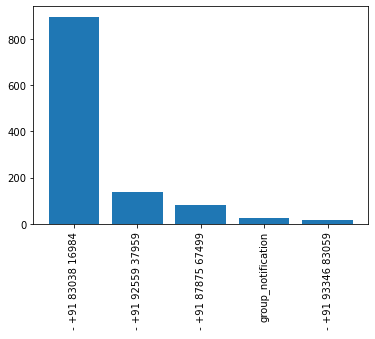

In [19]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [20]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

,name,percent
0,- +91 83038 16984,71.79
1,- +91 92559 37959,10.90
2,- +91 87875 67499,6.65
3,group_notification,2.00
4,- +91 93346 83059,1.28
5,- +91 70795 22590,1.20
6,- +91 6378 339 891,0.96
7,- +91 78001 78942,0.64
8,- +91 81268 48040,0.56
9,- +91 96503 96863,0.56


In [21]:
pip install emoji

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [26]:
import emoji
from collections import Counter

In [27]:
emojis = []
for message in df['message']:
        emojis.extend([c for c in message if c in emoji.unicode_codes.EMOJI_DATA])

emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))), columns=['emoji', 'count'])

In [28]:
df['month_num'] = df['date'].dt.month

In [29]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

In [30]:
timeline

,year,month_num,month,message
0,2023,7,July,45
1,2023,8,August,447
2,2023,9,September,368
3,2023,10,October,300
4,2023,11,November,88


In [31]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

timeline['time'] = time

In [32]:
timeline


,year,month_num,month,message,time
0,2023,7,July,45,July-2023
1,2023,8,August,447,August-2023
2,2023,9,September,368,September-2023
3,2023,10,October,300,October-2023
4,2023,11,November,88,November-2023


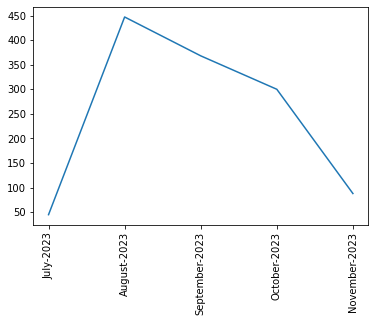

In [36]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()